# Grid and Random search cv(crossvalidation)

### References

https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec

https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35

In [2]:
#import the required libraries
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the iris dataset
iris=load_iris()
x=iris.data
y=iris.target

cross_val_score" splits the data into say 10 folds. Then for each fold it fits the data on 9 folds and scores the 10th fold. Then it gives you the 10 scores from which you can calculate a mean and variance for the score. You crossval to tune parameters and get an estimate of the score.if you dont mention cv value by default it is 5

In [5]:
#we will calculate the cross_val_score for 10 cross validations
knn=KNeighborsClassifier(n_neighbors=5)
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(score)
print('\n\nscoremean',score.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


scoremean 0.9666666666666668


we can calculate the best k value using a forloop without using any cv technique as given below:
The output of the forloop prints the cross_val_score for each different value of K.
By considering the accuracy value we can know what is the best value of K.

In [7]:
K_range=range(1,31)
k_scores=[]
for k in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
        
print(k_scores)        

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


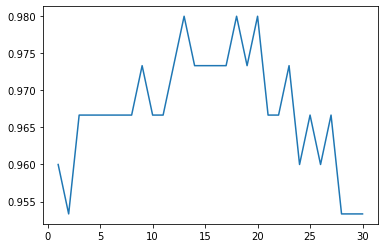

In [8]:
plt.plot(K_range,k_scores)

As we saw above we can know the best value of k using forloop.
But in a lot of cases there will be so many paramaters and for so many parameters we need to find the best combinations to get the best results.
using a forloop we can do but that is a hectic task.
we can do that using some cross validation techniques.


## GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV

In [21]:
k_range=range(1,31)
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [22]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [23]:
grid.cv_results_

{'mean_fit_time': array([0.00060084, 0.00090053, 0.0005008 , 0.00040014, 0.00040004,
        0.        , 0.        , 0.        , 0.00060902, 0.00020001,
        0.00039999, 0.00039985, 0.        , 0.00030003, 0.00070031,
        0.00069988, 0.00049992, 0.00019987, 0.00050001, 0.00039985,
        0.00049999, 0.0003001 , 0.00039999, 0.00090005, 0.00039973,
        0.00049999, 0.00059967, 0.00099945, 0.00010002, 0.00060019]),
 'std_fit_time': array([4.90595706e-04, 3.00184736e-04, 5.00802754e-04, 4.90066951e-04,
        4.89950301e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.97926243e-04, 4.00018696e-04, 4.89891669e-04, 4.89716990e-04,
        0.00000000e+00, 4.58297309e-04, 4.58459215e-04, 4.58178249e-04,
        4.99916356e-04, 3.99732764e-04, 5.00011519e-04, 4.89716700e-04,
        4.99987641e-04, 4.58406455e-04, 4.89892075e-04, 3.00019416e-04,
        4.89571374e-04, 4.99987618e-04, 4.89629107e-04, 5.64201334e-07,
        3.00049782e-04, 4.90058416e-04]),
 'mean_scor

In [24]:
k_range=range(1,31)
weight_options=['uniform','distance']
param_grid=dict(n_neighbors=k_range,weights=weight_options)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
grid.cv_results_

{'mean_fit_time': array([6.00337982e-04, 4.99987602e-04, 7.00473785e-04, 6.99949265e-04,
        2.00200081e-04, 5.00249863e-04, 5.00106812e-04, 4.00137901e-04,
        3.00359726e-04, 5.00154495e-04, 8.99624825e-04, 5.00035286e-04,
        7.99989700e-04, 4.99725342e-04, 4.99939919e-04, 5.99718094e-04,
        2.00319290e-04, 4.99773026e-04, 8.00275803e-04, 4.99892235e-04,
        5.00011444e-04, 4.99916077e-04, 6.60276413e-04, 5.99884987e-04,
        1.00021362e-03, 5.00082970e-04, 2.00057030e-04, 3.99994850e-04,
        0.00000000e+00, 5.00559807e-04, 2.00200081e-04, 7.00283051e-04,
        5.00106812e-04, 3.99804115e-04, 5.97405434e-04, 4.00161743e-04,
        5.00154495e-04, 4.00185585e-04, 9.99689102e-05, 3.99923325e-04,
        1.00014210e-03, 4.99749184e-04, 1.00159645e-04, 4.00066376e-04,
        1.00040436e-04, 3.99971008e-04, 9.00411606e-04, 3.99708748e-04,
        4.00090218e-04, 5.00392914e-04, 6.00266457e-04, 6.00266457e-04,
        2.99859047e-04, 4.99939919e-04, 3.99899

In [26]:
grid.best_score_

0.9800000000000001

In [27]:
grid.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

### RandomizedSearchCV 

In [28]:
from sklearn.model_selection import RandomizedSearchCV 
from random import randint
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]}   

In [29]:
k_range=range(1,31)
weight_options=['uniform','distance']
param_grid=dict(n_neighbors=k_range,weights=weight_options)
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [30]:
tree_cv = RandomizedSearchCV(knn, param_grid, cv = 5) 
  
tree_cv.fit(x, y) 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']})

In [35]:
tree_cv.cv_results_

{'mean_fit_time': array([0.00060034, 0.        , 0.0005991 , 0.00059991, 0.00059929,
        0.00079989, 0.00019979, 0.00039978, 0.00059996, 0.00020008]),
 'std_fit_time': array([0.00049017, 0.        , 0.00048916, 0.00048983, 0.00048932,
        0.00039995, 0.00039959, 0.00048963, 0.00048986, 0.00040016]),
 'mean_score_time': array([0.00259967, 0.00260124, 0.00220132, 0.00140004, 0.00120082,
        0.00080042, 0.00100012, 0.00080047, 0.002     , 0.00100017]),
 'std_score_time': array([4.90038182e-04, 4.91229105e-04, 4.00663029e-04, 4.91011899e-04,
        4.00710315e-04, 4.00210861e-04, 9.34406182e-07, 4.00233961e-04,
        3.23406696e-07, 5.00111031e-07]),
 'param_weights': masked_array(data=['uniform', 'uniform', 'uniform', 'distance',
                    'distance', 'distance', 'distance', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
 

In [36]:
tree_cv.best_score_

0.9866666666666667

In [37]:
tree_cv.best_params_

{'weights': 'distance', 'n_neighbors': 11}